# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys_mine import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        time.sleep(2)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhob
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | licheng
Processing Record 10 of Set 1 | srivardhan
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | yallahs
Processing Record 14 of Set 1 | havre
Processing Record 15 of Set 1 | haiku-pauwela
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | kibaya
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | devils lake
Processing Record 20 of Set 1 | sharkawshchyna
Processing Record 21 of Set 1 | middelburg
Processing Record 22 of Set 1 | marsh harbour
Processing 

Processing Record 39 of Set 4 | ascencion de guarayos
City not found. Skipping...
Processing Record 40 of Set 4 | saratamata
City not found. Skipping...
Processing Record 41 of Set 4 | fort st. john
Processing Record 42 of Set 4 | nar'yan-mar
Processing Record 43 of Set 4 | xunchang
Processing Record 44 of Set 4 | adrar
Processing Record 45 of Set 4 | altai
Processing Record 46 of Set 4 | tralee
Processing Record 47 of Set 4 | margate
Processing Record 48 of Set 4 | pacific grove
Processing Record 49 of Set 4 | son la
Processing Record 0 of Set 5 | lagoa
Processing Record 1 of Set 5 | punta arenas
Processing Record 2 of Set 5 | vorgashor
Processing Record 3 of Set 5 | dzilam gonzalez
Processing Record 4 of Set 5 | lorengau
Processing Record 5 of Set 5 | castillos
Processing Record 6 of Set 5 | vadso
Processing Record 7 of Set 5 | lata
Processing Record 8 of Set 5 | andovoranto
Processing Record 9 of Set 5 | guerrero negro
Processing Record 10 of Set 5 | badger
Processing Record 11 of S

Processing Record 27 of Set 8 | hirara
Processing Record 28 of Set 8 | sheridan
Processing Record 29 of Set 8 | revda
Processing Record 30 of Set 8 | cabugao
Processing Record 31 of Set 8 | palikir - national government center
Processing Record 32 of Set 8 | punto fijo
Processing Record 33 of Set 8 | springs
Processing Record 34 of Set 8 | urzhar
Processing Record 35 of Set 8 | horta
Processing Record 36 of Set 8 | atafu village
Processing Record 37 of Set 8 | bubaque
Processing Record 38 of Set 8 | ciudad madero
Processing Record 39 of Set 8 | axim
Processing Record 40 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 41 of Set 8 | kruisfontein
Processing Record 42 of Set 8 | brookings
Processing Record 43 of Set 8 | mizdah
Processing Record 44 of Set 8 | lebu
Processing Record 45 of Set 8 | vanino
Processing Record 46 of Set 8 | agadez
Processing Record 47 of Set 8 | mitsamiouli
Processing Record 48 of Set 8 | guingamp
Processing Record 49 of Set 8 | chul'man


Processing Record 16 of Set 12 | sengiley
Processing Record 17 of Set 12 | essaouira
Processing Record 18 of Set 12 | terenozek
Processing Record 19 of Set 12 | las trojes
Processing Record 20 of Set 12 | ketchikan
Processing Record 21 of Set 12 | ouahigouya
Processing Record 22 of Set 12 | jieyang
Processing Record 23 of Set 12 | jiangmen
Processing Record 24 of Set 12 | inhambane
Processing Record 25 of Set 12 | luba
Processing Record 26 of Set 12 | binh long
City not found. Skipping...
Processing Record 27 of Set 12 | antsohihy
Processing Record 28 of Set 12 | dire
Processing Record 29 of Set 12 | tabou
Processing Record 30 of Set 12 | shenjiamen
Processing Record 31 of Set 12 | big spring
Processing Record 32 of Set 12 | koryazhma
Processing Record 33 of Set 12 | fredericton
Processing Record 34 of Set 12 | benguela
Processing Record 35 of Set 12 | sidi ifni
Processing Record 36 of Set 12 | guichon
Processing Record 37 of Set 12 | huanggang
-----------------------------
Data Retrie

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhob,31.3411,69.4481,21.13,17,1,1.56,PK,1698331289
1,yellowknife,62.4560,-114.3525,-1.71,86,100,5.14,CA,1698331021
2,ilulissat,69.2167,-51.1000,0.01,64,75,7.20,GL,1698331293
3,iqaluit,63.7506,-68.5145,-4.15,79,100,6.17,CA,1698331295
4,puerto natales,-51.7236,-72.4875,5.25,65,40,9.77,CL,1698331298


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Output_Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zhob,31.3411,69.4481,21.13,17,1,1.56,PK,1698331289
1,yellowknife,62.4560,-114.3525,-1.71,86,100,5.14,CA,1698331021
2,ilulissat,69.2167,-51.1000,0.01,64,75,7.20,GL,1698331293
3,iqaluit,63.7506,-68.5145,-4.15,79,100,6.17,CA,1698331295
4,puerto natales,-51.7236,-72.4875,5.25,65,40,9.77,CL,1698331298


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

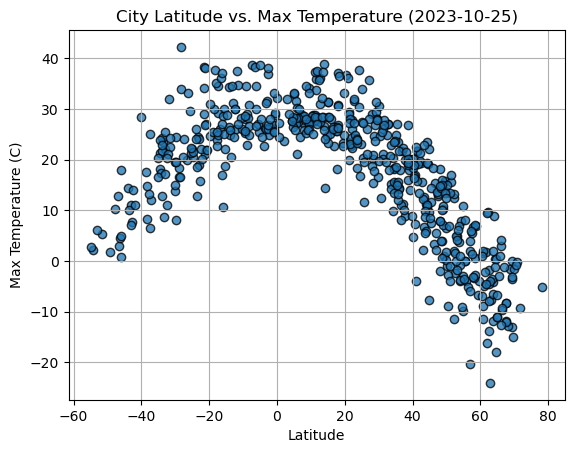

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors = "black", alpha = 0.77)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-10-25)")
plt.grid()

# Save the figure
plt.savefig("Output_Data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

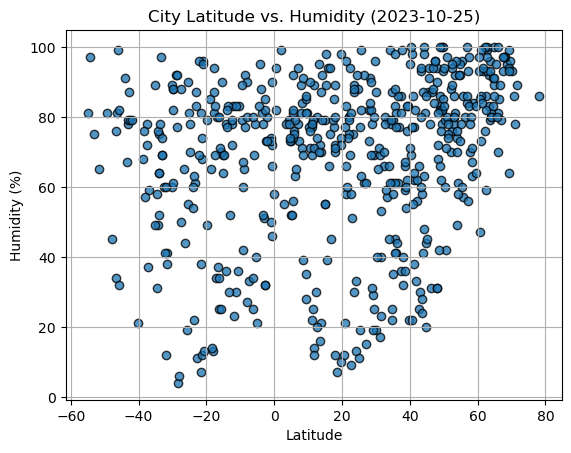

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black", alpha = 0.77)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-10-25)")
plt.grid()

# Save the figure
plt.savefig("Output_Data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

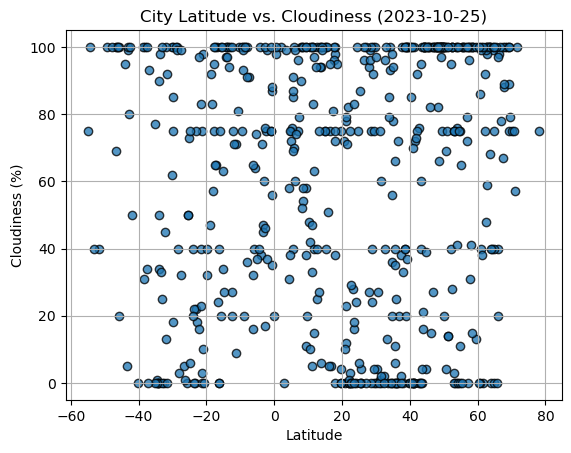

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black", alpha = 0.77)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-10-25)")
plt.grid()

# Save the figure
plt.savefig("Output_Data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

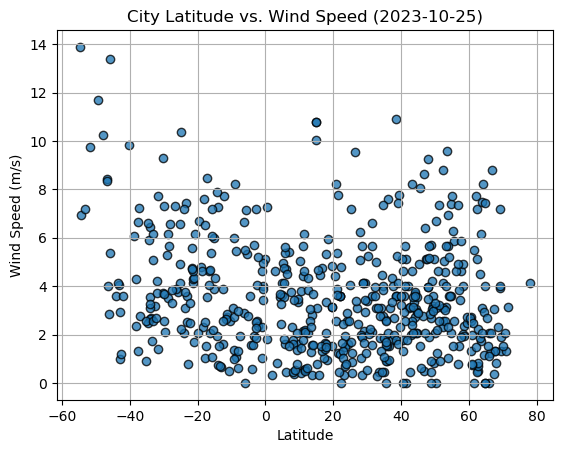

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = "black", alpha = 0.77)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-10-25)")
plt.grid()

# Save the figure
plt.savefig("Output_Data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def LR(xValues, yValues):
    plt.scatter(xValues, yValues)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
    LRValues = (xValues*slope) + intercept
    plt.plot(xValues, LRValues, "r-")
    LREQ = "y= "+str(round(slope,2))+"x+"+str(round(slope,2))
    #The parameters to position the equation on the graph-"xy=" and "xycoords" were sourced from matplotlib.org.
    plt.annotate(LREQ, xy=(0.05, 0.60), xycoords= "axes fraction", fontsize = 15, color = "red")
    print(f"The r-value is: {rvalue**2}")
    return
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zhob,31.3411,69.4481,21.13,17,1,1.56,PK,1698331289
1,yellowknife,62.4560,-114.3525,-1.71,86,100,5.14,CA,1698331021
2,ilulissat,69.2167,-51.1000,0.01,64,75,7.20,GL,1698331293
3,iqaluit,63.7506,-68.5145,-4.15,79,100,6.17,CA,1698331295
5,qaqortoq,60.7167,-46.0333,1.59,47,86,2.71,GL,1698331300


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,puerto natales,-51.7236,-72.4875,5.25,65,40,9.77,CL,1698331298
7,waitangi,-43.9535,-176.5597,14.34,91,95,3.58,NZ,1698331304
11,papatowai,-46.5619,169.4708,2.98,76,100,8.41,NZ,1698331312
16,kibaya,-5.3000,36.5667,25.38,40,74,5.31,TZ,1698331323
20,middelburg,-25.7751,29.4648,29.51,19,0,3.75,ZA,1698331332


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7663623316669333


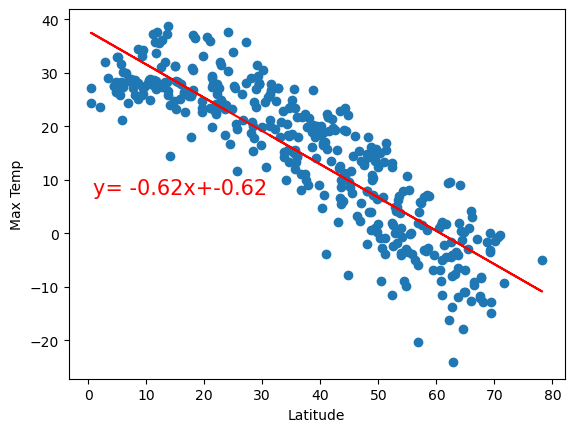

In [23]:
# Linear regression on Northern Hemisphere
xValues = northern_hemi_df["Lat"]
yValues = northern_hemi_df["Max Temp"]

LR(xValues, yValues)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.5225785220767353


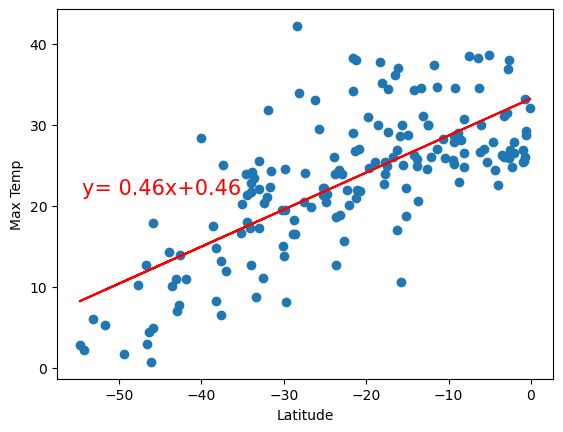

In [24]:
# Linear regression on Southern Hemisphere
xValues = southern_hemi_df["Lat"]
yValues = southern_hemi_df["Max Temp"]

LR(xValues, yValues)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** At first glance, it is clear that there a relationship does exist between latitude and the potential maximum temperatures of cities in both hemispheres. The r-value for the plot displaying cities in the Northern Hemisphere reveals a correlation that is bordering on strong and that of the one for cities in the Southern Hemishphere can be considered weak to moderate. The significance of these numbers is that the linear regression model for the Northern Hemisphere can be regarded as relatively accurate, and therefore, a prediction can be made- as a city's latitude moves away from 0 in a positive direction, its potential maximum teperature decreases. Although the Southern Hemisphere's correlation is a little bit weaker, and the linear regression model ought not to be relied on too signficiacntly, it can be loosely predicted that latitude and potential maximum temperature have an opposite, positive correlation when compared to their relaitonship in the Northern Hemisphere. In other words, as a city's latitude moves closer to 0 in a positive direction, its potential maximum teperature increases. These findings, when viewed together, can be confirmed by general knoweldge regarding temperatures at the equator- when a city is closer to the euqator- Latitude 0- then its potenetial maximum temperature is greater.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07430766228920589


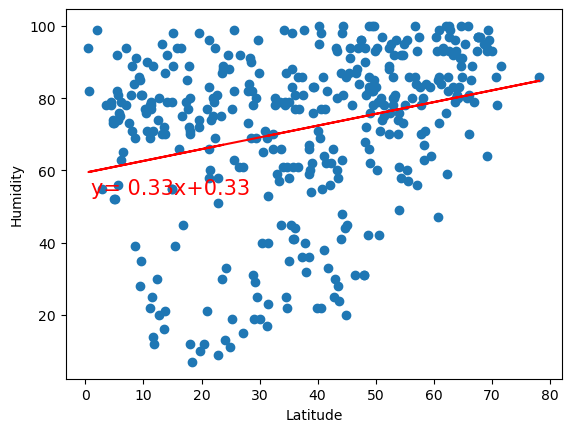

In [25]:
# Northern Hemisphere
xValues = northern_hemi_df["Lat"]
yValues = northern_hemi_df["Humidity"]

LR(xValues, yValues)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.00346597056142468


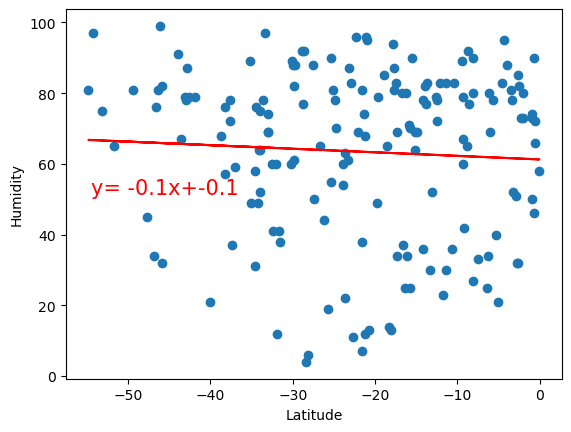

In [26]:
# Southern Hemisphere
xValues = southern_hemi_df["Lat"]
yValues = southern_hemi_df["Humidity"]

LR(xValues, yValues)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Here, without considering the r-values at all, it is evident that there is a negligible correlation between latitude and humidity in either hemisphere. The regression line does not fit the trend of the points on the scatterplot (if one can claim that there is a trend at all) and therefore, it is clear that is difficult, if not impossible, to predict the potential humidity of a city based on the latitude. For further confirmation, the r-values of both datasets are significantly less than 0.3, which is the value that is a border for a very weak correlation. The significance of this is that the linear regression models cannot be considered accurate and/or interpreted meaningfully. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01508958403527012


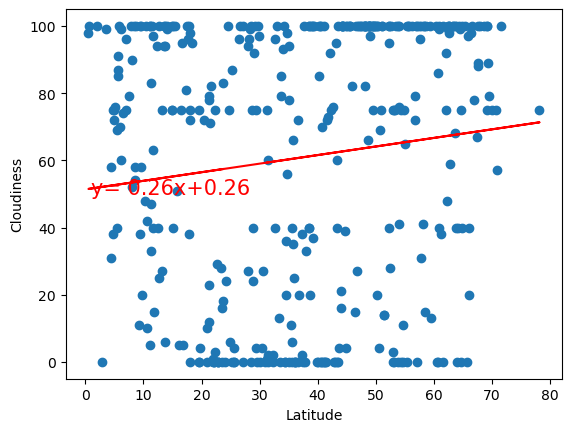

In [27]:
# Northern Hemisphere
xValues = northern_hemi_df["Lat"]
yValues = northern_hemi_df["Cloudiness"]

LR(xValues, yValues)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.0025033028075496302


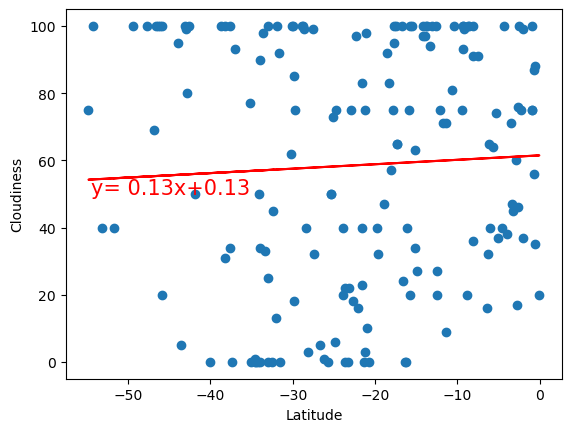

In [28]:
# Southern Hemisphere
xValues = southern_hemi_df["Lat"]
yValues = southern_hemi_df["Cloudiness"]

LR(xValues, yValues)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** The relationship between cloudiness and latitude is very similar to that of humidity and latitude in that no correlation exists. Once again, this is evident not only in the improper fit of the regression line to the points on the scatterplot but also in the r-values that are both significantly lower than 0.3. Actually, I suppose it's possible to claim that there is even less of correlation between cloudiness and latitude than there is between humidity and latitude, but it is irrelevant as the differences in r-values are negligible both when compared with one another and to the scale that adds meaning to those numbers. Once again, neither of models can be used for predicitve analysis as the equations generated are not reflective of any trends in the data. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00251043762707653


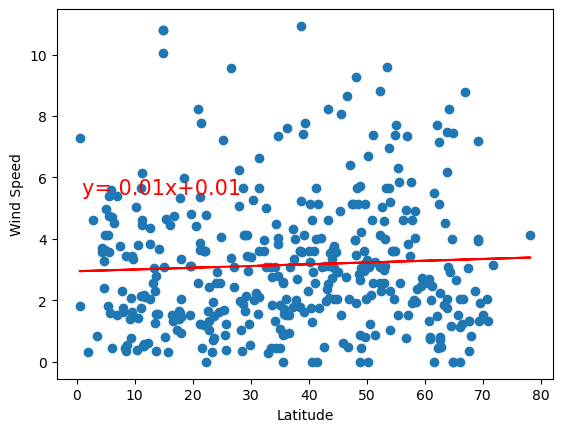

In [29]:
# Northern Hemisphere
xValues = northern_hemi_df["Lat"]
yValues = northern_hemi_df["Wind Speed"]

LR(xValues, yValues)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: 0.12340206393535862


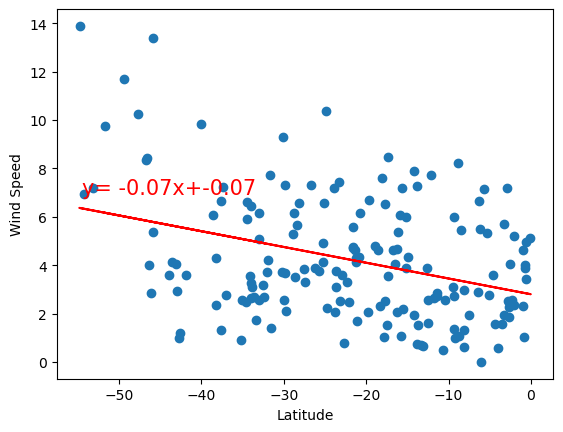

In [22]:
# Southern Hemisphere
xValues = southern_hemi_df["Lat"]
yValues = southern_hemi_df["Wind Speed"]

LR(xValues, yValues)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** The final plots comparing wind speed and latitude also do not reveal anything particularly meaningful as regression line fits are, again, not indicative of any potential trends in either the existing or future data. As is evident, the wind speeds for the cities at each latitude vary diversely, and therefore, cannot be used to determine potential future wind speeds for cities not included in the dataset. Further confriming this observation is the fact that the r-values are both less than 0.3, which signifies that there is little to no correlation between these two factors.

As a final thought, I do believe that the interpretations of these models, and the correlation between the factors displayed on each plot, are likely accurate as I ran this program at least three times and I saw similar scatterplots and r-values each time regardless of the randomness of which cities were in the dataset. Therefore, it is likely true to state that the only set of factors, which have been considered here, that may experience sumultaneous movement is latitude and potential maximum temperature.